In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('train.csv')
df1=pd.read_csv('test.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [55]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [56]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

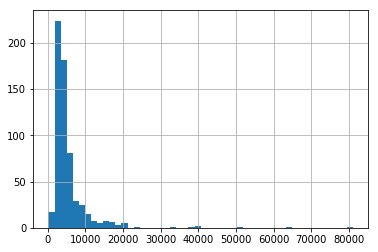

In [57]:
        #To see the incomes of all the people

df['ApplicantIncome'].hist(bins=50)
plt.show()

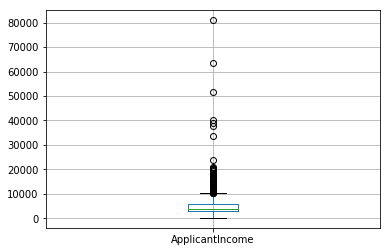

In [58]:
        #To check the number of outliers 

df.boxplot(column='ApplicantIncome')
plt.show()

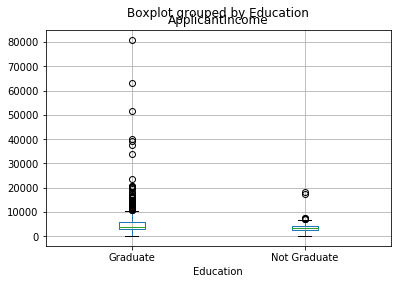

In [59]:
    #Since there are lot of outliers, we draw boxplot w.r.t education
    
df.boxplot(column='ApplicantIncome',by='Education')
plt.show()

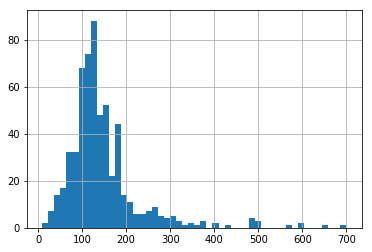

In [60]:
        #Histogram of the LoanAmount
    
df['LoanAmount'].hist(bins=50)
plt.show()

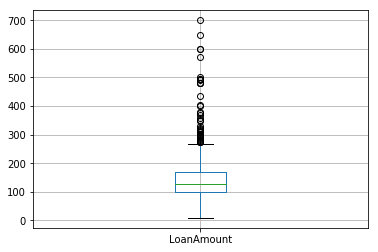

In [61]:
        #Boxplot of the LoanAmount
    
df.boxplot(column='LoanAmount')
plt.show()

In [62]:
temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())

print("Frequency table for Credit History")
temp1


Frequency table for Credit History


0.0     89
1.0    475
Name: Credit_History, dtype: int64

In [63]:
print("Probability of getting loan for each Credit History Class")
temp2

Probability of getting loan for each Credit History Class


,Loan_Status
Credit_History,
0.0,0.078652
1.0,0.795789


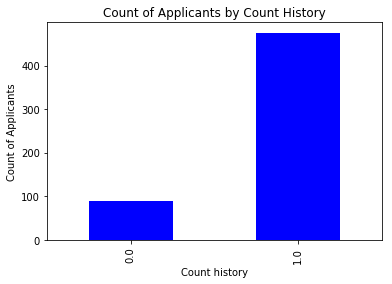

In [64]:
    #plotting  a graph between the number of applicants and their count history

temp1.plot(kind='bar',color='blue')
plt.xlabel('Count history')
plt.ylabel('Count of Applicants')
plt.title('Count of Applicants by Count History')
plt.show()

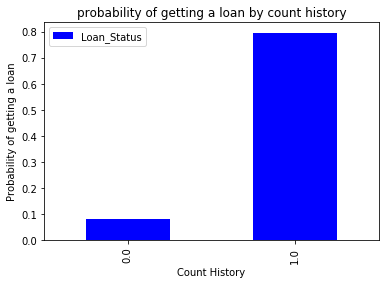

In [65]:
        #pltting a graph between the count history and their loan status
    
    
temp2.plot(kind='bar',color='blue')
plt.xlabel('Count History')
plt.ylabel('Probability of getting a loan')
plt.title('probability of getting a loan by count history')
plt.show()

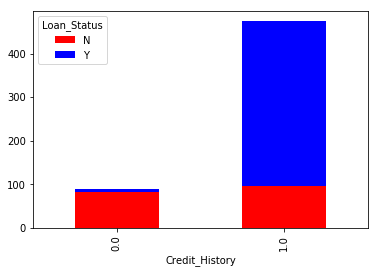

In [66]:
    #Combining both these graphs into 1 chart
    
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)
plt.show()

In [67]:
        #Time for Data Mugging i.e replacing all the NaN value
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [68]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [69]:
        #Filling all the NaN value in the Self Employed Column with the 'No' since the value count of No is 7 times 'Yes'
    
df['Self_Employed'].fillna('No',inplace=True)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [71]:
        #Defining a pivot table which tell us the loan amount on the basis of Education and Self Employed

table = df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
table

Education,Graduate,Not Graduate
Self_Employed,,
No,130.0,113.0
Yes,157.5,130.0


In [72]:

def func(x):
 return table.loc[x['Self_Employed'],x['Education']]

In [73]:
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(func, axis=1), inplace=True)

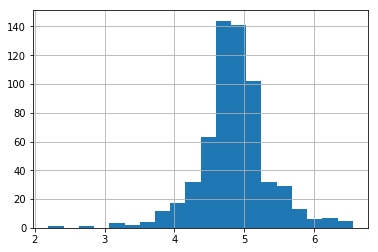

In [74]:
         #Treating the extreme amounts in Loan Amount

df['LoanAmount_Log']=np.log(df['LoanAmount'])
df['LoanAmount_Log'].hist(bins=20)
plt.show()

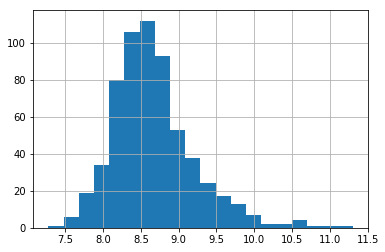

In [75]:
    #Combining ApplicantIncome and CoapplicantIncome into Total INcome
    
df['Total_Income']=df['ApplicantIncome']+df['CoapplicantIncome']
df['Total_Income_Log']=np.log(df['Total_Income'])
df['Total_Income_Log'].hist(bins=20)
plt.show()

In [76]:
    #Replacing all the NaN values in the Gender Column with Male

df['Gender'].fillna('Male',inplace=True)

    #Replacing all the NaN values in the Married Column with Yes
    
df['Married'].fillna('Yes',inplace=True)
    
    #Replacing all the NaN values in the Dependents column with 0
    
df['Dependents'].fillna('0',inplace=True)

    #Replacing all the NaN values in the Loan Amount Term with 360.0
    
df['Loan_Amount_Term'].fillna('360.0',inplace=True)

    #Replacing all the NaN values in the Credit History with 1

df['Credit_History'].fillna('1',inplace=True)


In [77]:
from sklearn.preprocessing import LabelEncoder
var=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le=LabelEncoder()
for i in var:
    df[i]=le.fit_transform(df[i])
    
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_Log,Total_Income,Total_Income_Log
0,LP001002,1,0,0,0,0,5849,0.0,130.0,360,1,2,1,4.867534,5849.0,8.674026
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360,1,0,0,4.852030,6091.0,8.714568
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360,1,2,1,4.189655,3000.0,8.006368
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360,1,2,1,4.787492,4941.0,8.505323
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360,1,2,1,4.948760,6000.0,8.699515


In [78]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(moedel, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome])

In [82]:
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education','Self_Employed']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 79.641%


In [101]:
    #Replacing all the NaN values in the Gender Column with Male

df1['Gender'].fillna('Male',inplace=True)

    #Replacing all the NaN values in the Married Column with Yes
    
df1['Married'].fillna('Yes',inplace=True)
    
    #Replacing all the NaN values in the Dependents column with 0
    
df1['Dependents'].fillna('0',inplace=True)

    #Replacing all the NaN values in the Loan Amount Term with 360.0
    
df1['Loan_Amount_Term'].fillna('360.0',inplace=True)

    #Replacing all the NaN values in the Credit History with 1

df1['Credit_History'].fillna('0',inplace=True)


In [105]:
from sklearn.preprocessing import LabelEncoder
var=['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
le=LabelEncoder()
for i in var:
    df1[i]=le.fit_transform(df1[i])

TypeError: '>' not supported between instances of 'str' and 'float'